# 머신러닝 프로젝트 주요 5단계

1. 문제정의
2. 자료준비
3. 알고리즘 평가
4. 결과 개선
5. 결과 표현

## 머신러닝의 Hello World 

* 붓꽃(Iris) 자료
* 다운로드 주소: 
  - 데이터 : http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
  - 메타데이터 : http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

In [21]:
!wget -h

GNU Wget 1.11.4, a non-interactive network retriever.

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc


Usage: wget [OPTION]... [URL]...

Mandatory arguments to long options are mandatory for short options too.

Startup:
  -V,  --version           display the version of Wget and exit.
  -h,  --help              print this help.
  -b,  --background        go to background after startup.
  -e,  --execute=COMMAND   execute a `.wgetrc'-style command.

Logging and input file:
  -o,  --output-file=FILE    log messages to FILE.
  -a,  --append-output=FILE  append messages to FILE.
  -d,  --debug               print lots of debugging information.
  -q,  --quiet               quiet (no output).
  -v,  --verbose             be verbose (this is the default).
  -nv, --no-verbose          turn off verboseness, without being quiet.
  -i,  --input-file=FILE     download URLs found in FILE.
  -F,  --force-html          treat input file as HTML.
  -B,  --base=URL            prepends URL to relative links in -F -i file.

Download:
  -t,  --tries=NUMBER            set number of retries to NUMBER (0 unlimi


syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc



       --referer=URL           include `Referer: URL' header in HTTP request.
       --save-headers          save the HTTP headers to file.
  -U,  --user-agent=AGENT      identify as AGENT instead of Wget/VERSION.
       --no-http-keep-alive    disable HTTP keep-alive (persistent connections).
       --no-cookies            don't use cookies.
       --load-cookies=FILE     load cookies from FILE before session.
       --save-cookies=FILE     save cookies to FILE after session.
       --keep-session-cookies  load and save session (non-permanent) cookies.
       --post-data=STRING      use the POST method; send STRING as the data.
       --post-file=FILE        use the POST method; send contents of FILE.
       --content-disposition   honor the Content-Disposition header when
                               choosing local file names (EXPERIMENTAL).
       --auth-no-challenge     Send Basic HTTP authentication information
                               without first waiting for the server

In [33]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -O data/iris.csv

In [34]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names -O data/iris.meta

## iris 데이터 설명

### 속성정보(sepal : 꽃받침, petal : 꽃잎)
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:
       --- 0: Iris Setosa
       --- 1: Iris Versicolour
       --- 2 :Iris Virginica

## 머신러닝 작업절차

1. Instaling the Python and SciPy platform. => SciPy 설치
2. Loading the dataset. => 자료불러오기
3. Summarizing the dataset. => 자료요약하기
4. Visualizing the dataset. => 자료시각화
5. Evaluating some algorithms. => 알고리즘 평가
6. Making some predictions. => 예측하기

In [36]:
!pip install Scipy

### 설치 라이브러리
1. scipy : pip install scipy
2. numpy  : pip install numpy
3. matplotlib : pip install matplotlib
4. pandas : pip install pandas
5. sklearn : pip install scikit-learn
6. seaborn : pip install seaborn    

### 버전확인

In [39]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.4
numpy: 1.19.4
matplotlib: 3.3.3
pandas: 1.1.4
sklearn: 0.23.2


## 1. 머신러닝 라이브러리 불러오기

In [41]:
import os
import sys
import time

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## 2. 자료불러오기

In [47]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
dataset.describe(include='all')

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [61]:
dataset.shape

(150, 5)

In [62]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

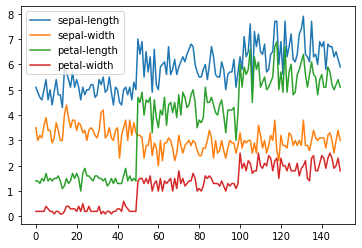

In [63]:
dataset.plot()

<AxesSubplot:>

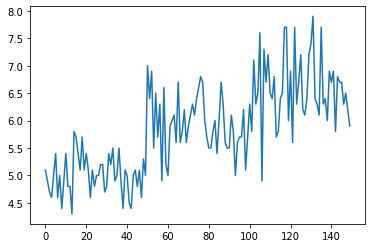

In [65]:
dataset['sepal-length'].plot()

In [66]:
dataset.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [68]:
dataset['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

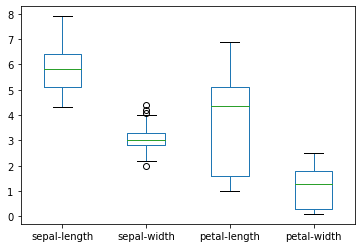

In [75]:
dataset.plot(kind='box')
plt.show()

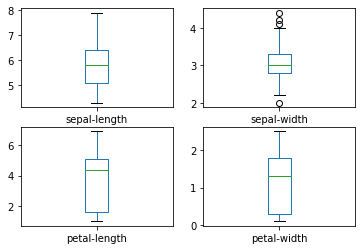

In [74]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

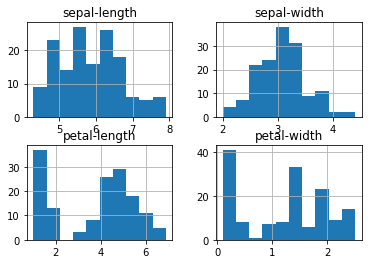

In [73]:
dataset.hist();
plt.show()

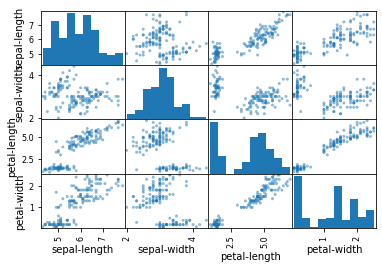

In [82]:
pd.plotting.scatter_matrix(dataset)
plt.show()

# 학습자료와 검증자료 분할하기

In [88]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
array = dataset.values

In [89]:
X = array[:, :4]
y = array[:, 4]

In [92]:
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3.0, 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5.0, 3.6, 1.4, 0.2]], dtype=object),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa'], dtype=object))

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=1024, shuffle=None, stratify=None)

# 모델 개발

## 기본모델 6가지

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM)

## 모델 정의

In [115]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))

In [116]:
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('RF', RandomForestClassifier())]

## 모델 평가

In [117]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    ## 모델별 10번 수행
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    ## 모델별 정확도 평가
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    print("\n========================================================")
    print(cv_results)    
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 
    print("\n========================================================")


[0.91666667 1.         1.         0.90909091 1.         1.
 1.         1.         0.90909091 1.        ]
LR: 0.973485 (0.040550)


[1.         0.91666667 1.         1.         1.         1.
 1.         1.         0.90909091 1.        ]
LDA: 0.982576 (0.034890)


[0.91666667 1.         1.         1.         1.         1.
 1.         0.90909091 1.         1.        ]
KNN: 0.982576 (0.034890)


[1.         0.83333333 1.         0.90909091 0.90909091 1.
 1.         1.         0.90909091 1.        ]
CART: 0.956061 (0.057675)


[0.91666667 0.83333333 1.         0.90909091 1.         1.
 1.         1.         0.90909091 1.        ]
NB: 0.956818 (0.057100)


[1.         1.         1.         0.90909091 1.         1.
 1.         0.90909091 1.         1.        ]
SVM: 0.981818 (0.036364)


[0.91666667 0.83333333 1.         0.90909091 1.         1.
 1.         0.90909091 0.90909091 1.        ]
RF: 0.947727 (0.056737)



# 모델 알고리즘 비교

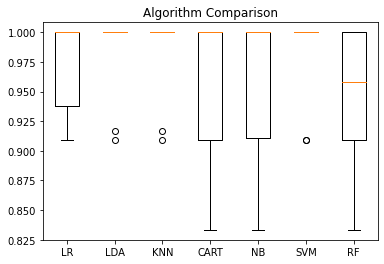

In [118]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# 모델 예측

In [120]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# 모델 예측 평가

In [133]:
print("Accuracy_score")
print('-'*100)
print('\n')
print(accuracy_score(Y_test, predictions))
print('#'*100)
print('\n')
print("Confusion Matrix")
print('-'*100)
print('\n')
print(confusion_matrix(Y_test, predictions))
print('#'*100)
print('\n')
print("Aclassification Report")
print('-'*100)
print('\n')
print(classification_report(Y_test, predictions))

Accuracy_score
----------------------------------------------------------------------------------------------------


0.9736842105263158
####################################################################################################


Confusion Matrix
----------------------------------------------------------------------------------------------------


[[11  0  0]
 [ 0 12  1]
 [ 0  0 14]]
####################################################################################################


Aclassification Report
----------------------------------------------------------------------------------------------------


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.98        38
   weighted avg       0.98    